# <center> <span style="color:indigo">        Escuela de ML y DL Módulo 1</span> </center> 
##  <center> <span style="color:DarkBlue">          Tarea 1: Árbol de decisión </span>  </center>
##  <center> <span style="color:DarkBlue"> Nombre y Apellidos: Norma Paulina Lopez Zamora </span>  </center>
##  <center> <span style="color:DarkBlue"> Correo electrónico: paulinalopezn1@gmail.com</span>  </center>
##  <center> <span style="color:DarkBlue"> Abril 2024</span>  </center>

dataset: https://www.kaggle.com/datasets/adityak80/trell-social-media-usage-data/data

##  Contenido
1. <span style="color:DarkBlue">Planteamiento del problema (qué hacer)</span>
2. <span style="color:DarkBlue">Planteamiento de la solución (cómo se hizó)</span>
3. <span style="color:DarkBlue">Ejemplo de ejecución (código)</span>
4. <span style="color:DarkBlue">Conclusiones </span>
5. <span style="color:DarkBlue">Referencias</span>

## <span style="color:DarkciónBlue"> 1. Planteamiento del problema</span>

Entrenar un árbol de decisión que clasifique a personas por rango de edad, utilizando como métricas de (im)pureza de nodos tanto GINI como la entropía.  Determinen cuál combinación de parámetros da mejores resultados

## <span style="color:DarkciónBlue"> 2. Planteamiento de la solución</span>
Se entrenó un árbol de decisión con diferentes métricas y parámetros 


## <span style="color:DarkciónBlue"> 3. Código</span>
A continuación se presenta el código y los diferentes pasos en "contenido" para llegar al resultado final 

In [2]:
import os
import sys
import zipfile
import numpy as np
import pandas as pd
import sklearn #machine learning
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder#reglas de dedo 70 30, 80 20, si no hay tiempo mejor 70 30, 
from sklearn.tree import DecisionTreeClassifier, plot_tree #clasificador baso en arboles de decision
from sklearn.model_selection import GridSearchCV #busqueda por validacion cruzada, para encontrar los mejores árametros para el modelo
from sklearn.metrics import (accuracy_score, confusion_matrix,
                             ConfusionMatrixDisplay, f1_score)#metrica de exactitud, f1 para medir el desempeño del modelo, dicen cual de los modelos es mejor relacionado a cual se equivoca menos en la 
#clasificacion

In [3]:
print(f'Versiones\n{"-"*9}')
print(f'Python: {sys.version}')
print(f'Numpy: {np.__version__}')
print(f'Pandas: {pd.__version__}')
print(f'Scikit Learn: {sklearn.__version__}')
print(f'Matplotlib: {matplotlib.__version__}')
print(f'Seaborn: {sns.__version__}')

Versiones
---------
Python: 3.11.8 | packaged by conda-forge | (main, Feb 16 2024, 20:40:50) [MSC v.1937 64 bit (AMD64)]
Numpy: 1.26.4
Pandas: 2.2.1
Scikit Learn: 1.4.1.post1
Matplotlib: 3.8.3
Seaborn: 0.13.2


In [4]:
PATH = "./archivos/"

# Contenido
## &nbsp;&nbsp;1. Preparar los datos
## &nbsp;&nbsp;2. Análisis Exploratorio de Datos (EDA)
## &nbsp;&nbsp;3. Imputar los datos nulos
## &nbsp;&nbsp;4. Codificar los datos categóricos
## &nbsp;&nbsp;5. Dividir los datos en la matriz $X$ y el vector de etiquetas $y$
## &nbsp;&nbsp;6. Crear el modelo
## &nbsp;&nbsp;7. Realizar predicciones
## &nbsp;&nbsp;8. Encontrar los mejores parámetros del modelo
## &nbsp;&nbsp;9. Actividad
---

## 1. Preparar los datos
El archivo original ha sido renombrado como "Titanic.zip"

In [5]:
# Sólo ejecutar la primera vez ya que, después de eso,
# la carpeta ya estará creada con los archivos necesarios
with zipfile.ZipFile(PATH + 'tarea1_dataset.zip', 'r') as archive:
   # Extract all the contents of zip file in current directory
    #with es muy util apara proteger el archivo para prevenir errores
    #"r" para abrir como lectura
    
   archive.extractall(PATH)
    

In [6]:
os.listdir(PATH) # se usarán solamente los archivos '.CSV'

['.ipynb_checkpoints',
 'sample_submission.csv',
 'tarea1_dataset.zip',
 'test_age_dataset.csv',
 'train_age_dataset.csv']

In [7]:
train = pd.read_csv(PATH + 'train_age_dataset.csv')#cargamos los datos de train

In [8]:
train.head()#subconjuto de prueba

,Unnamed: 0,userId,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,...,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group
0,265153,48958844,2,1,0.0,0.0,0.0,0,0.0,0.0,...,0.200000,0.0,0.041667,0.025000,0.0,0.000000,0.175000,0.033333,0.0,1
1,405231,51100441,2,2,0.0,0.0,0.0,0,0.0,0.0,...,0.093220,0.0,0.012712,0.018644,0.0,0.084746,0.000000,0.033898,82.5,2
2,57867,6887426,2,1,0.0,0.0,0.0,0,0.0,0.0,...,0.002786,0.0,0.000000,0.000557,0.0,0.002786,0.000000,0.000000,0.0,1
3,272618,50742404,2,1,0.0,0.0,0.0,0,0.0,0.0,...,0.008403,0.0,0.000000,0.001681,0.0,0.000000,0.000000,0.008403,0.0,1
4,251123,45589200,2,2,0.0,0.0,0.0,0,0.0,0.0,...,0.204918,0.0,0.000000,0.049180,0.0,0.008197,0.057377,0.180328,0.0,1


In [9]:
test = pd.read_csv(PATH + 'test_age_dataset.csv')#cargamos los datos de test

In [10]:
test.head()

,Unnamed: 0,userId,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,...,creations,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2
0,62683,33840667,2,1,0.000000,0.0,0.0,0,0.0,0.0,...,0.000000,0.062992,0.0,0.000000,0.012598,0.000000,0.000000,0.062992,0.000000,0.0
1,173104,1828421,2,1,0.001818,0.0,0.0,0,0.0,0.0,...,0.000000,0.003636,0.0,0.000000,0.000727,0.000000,0.000000,0.003636,0.000000,0.0
2,306061,57353310,2,1,0.000000,0.0,0.0,0,0.0,0.0,...,0.000000,1.028571,0.0,0.000000,0.211429,0.000000,0.000000,0.742857,0.314286,0.0
3,422061,36618563,2,2,0.000000,0.0,0.0,4,0.0,0.0,...,0.007937,0.166667,0.0,0.067460,0.006349,0.000000,0.111111,0.023810,0.031746,201.0
4,219653,39484434,2,1,0.000000,0.0,0.0,0,0.0,0.0,...,0.000000,0.233871,0.0,0.116935,0.000000,0.233871,0.000000,0.000000,0.000000,0.0


In [11]:
sample = pd.read_csv(PATH + 'sample_submission.csv')
sample.head()

,prediction
0,1
1,1
2,1
3,1
4,1


## 2. Análisis Exploratorio de Datos (EDA)
Esto se realiza con el fin de darnos una idea de cómo son los datos y que contienen

In [12]:
train.info()#para ver atributos, columnas, datos vacios, tipo de datos, 
#del conjunto de datos de entrenamiento
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488877 entries, 0 to 488876
Data columns (total 27 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Unnamed: 0                       488877 non-null  int64  
 1   userId                           488877 non-null  int64  
 2   tier                             488877 non-null  int64  
 3   gender                           488877 non-null  int64  
 4   following_rate                   488877 non-null  float64
 5   followers_avg_age                488877 non-null  float64
 6   following_avg_age                488877 non-null  float64
 7   max_repetitive_punc              488877 non-null  int64  
 8   num_of_hashtags_per_action       488877 non-null  float64
 9   emoji_count_per_action           488877 non-null  float64
 10  punctuations_per_action          488877 non-null  float64
 11  number_of_words_per_action       488877 non-null  float64
 12  av

vemos hay 488877 registros y 27 columnas
No hay valores nulos en ninguna columna.
También se observa que el tipo de datos en todas las columnas es numerico.
Hay una columna que no tiene nombre ```Unnamed: 0 ```  y en la descripción de los datos que se puede consultar en 
https://www.kaggle.com/datasets/adityak80/trell-social-media-usage-data/data
no viene información de la misma, por lo tanto se eliminará esta columna, también se eliminará el  ```userId``` que es un identificador, sin embargo en este caso no lo considero necesario para el modelo. Finalmente se eliminará la columna ```tier``` debido a que la descripción qué representan los datos en esta columna no es clara y no se especifica a qué corresponde cada categoría

In [13]:
test.info() #informacion del data set de prueba

#54320  registros,26 columnas y no se observan datos nulos


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54320 entries, 0 to 54319
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       54320 non-null  int64  
 1   userId                           54320 non-null  int64  
 2   tier                             54320 non-null  int64  
 3   gender                           54320 non-null  int64  
 4   following_rate                   54320 non-null  float64
 5   followers_avg_age                54320 non-null  float64
 6   following_avg_age                54320 non-null  float64
 7   max_repetitive_punc              54320 non-null  int64  
 8   num_of_hashtags_per_action       54320 non-null  float64
 9   emoji_count_per_action           54320 non-null  float64
 10  punctuations_per_action          54320 non-null  float64
 11  number_of_words_per_action       54320 non-null  float64
 12  avgCompletion     

 En este caso, también eliminaremos la columna ```userId``` , ``` Unnamed: 0 ``` y  ``` tier ```

In [14]:
sample.info()#data set de genero

#hay 54320 registros y 1 columna, sin datos faltantes 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54320 entries, 0 to 54319
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   prediction  54320 non-null  int64
dtypes: int64(1)
memory usage: 424.5 KB


In [15]:
#eliminar columnas userid y unnamed: 0

train.drop(['Unnamed: 0', 'userId', 'tier'], axis=1, inplace=True) #eliminamos columnas unnamed, userId y tier
#axis=1, es : columna 1
#inplace es que lo haga sobre el data frame train, para que pandas no haga una copia
train.head()

,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,number_of_words_per_action,avgCompletion,...,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group
0,1,0.0,0.0,0.0,0,0.0,0.0,0.000000,0.000000,0.463330,...,0.200000,0.0,0.041667,0.025000,0.0,0.000000,0.175000,0.033333,0.0,1
1,2,0.0,0.0,0.0,0,0.0,0.0,0.076923,0.153846,0.429468,...,0.093220,0.0,0.012712,0.018644,0.0,0.084746,0.000000,0.033898,82.5,2
2,1,0.0,0.0,0.0,0,0.0,0.0,0.000000,0.000000,0.341657,...,0.002786,0.0,0.000000,0.000557,0.0,0.002786,0.000000,0.000000,0.0,1
3,1,0.0,0.0,0.0,0,0.0,0.0,0.000000,0.000000,0.005735,...,0.008403,0.0,0.000000,0.001681,0.0,0.000000,0.000000,0.008403,0.0,1
4,2,0.0,0.0,0.0,0,0.0,0.0,0.000000,0.000000,0.456549,...,0.204918,0.0,0.000000,0.049180,0.0,0.008197,0.057377,0.180328,0.0,1


In [16]:
test.drop(['Unnamed: 0', 'userId', 'tier'], axis=1, inplace=True) #eliminamos columnas unnamed, userId Y tier
#axis=1, es : columna 1
#inplace es que lo haga sobre el data frame train, para que pandas no haga una copia
test.head()

,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,number_of_words_per_action,avgCompletion,...,creations,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2
0,1,0.000000,0.0,0.0,0,0.0,0.0,0.0,0.000000,0.033242,...,0.000000,0.062992,0.0,0.000000,0.012598,0.000000,0.000000,0.062992,0.000000,0.0
1,1,0.001818,0.0,0.0,0,0.0,0.0,0.0,0.000000,0.051057,...,0.000000,0.003636,0.0,0.000000,0.000727,0.000000,0.000000,0.003636,0.000000,0.0
2,1,0.000000,0.0,0.0,0,0.0,0.0,0.0,0.000000,0.190984,...,0.000000,1.028571,0.0,0.000000,0.211429,0.000000,0.000000,0.742857,0.314286,0.0
3,2,0.000000,0.0,0.0,4,0.0,0.0,0.0,0.130435,0.460543,...,0.007937,0.166667,0.0,0.067460,0.006349,0.000000,0.111111,0.023810,0.031746,201.0
4,1,0.000000,0.0,0.0,0,0.0,0.0,0.0,0.000000,0.205251,...,0.000000,0.233871,0.0,0.116935,0.000000,0.233871,0.000000,0.000000,0.000000,0.0


In [17]:
train.info()#vemos que no hay datos nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488877 entries, 0 to 488876
Data columns (total 24 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   gender                           488877 non-null  int64  
 1   following_rate                   488877 non-null  float64
 2   followers_avg_age                488877 non-null  float64
 3   following_avg_age                488877 non-null  float64
 4   max_repetitive_punc              488877 non-null  int64  
 5   num_of_hashtags_per_action       488877 non-null  float64
 6   emoji_count_per_action           488877 non-null  float64
 7   punctuations_per_action          488877 non-null  float64
 8   number_of_words_per_action       488877 non-null  float64
 9   avgCompletion                    488877 non-null  float64
 10  avgTimeSpent                     488877 non-null  float64
 11  avgDuration                      488877 non-null  float64
 12  av

In [18]:
test.info()#no hay datos nulos


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54320 entries, 0 to 54319
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   gender                           54320 non-null  int64  
 1   following_rate                   54320 non-null  float64
 2   followers_avg_age                54320 non-null  float64
 3   following_avg_age                54320 non-null  float64
 4   max_repetitive_punc              54320 non-null  int64  
 5   num_of_hashtags_per_action       54320 non-null  float64
 6   emoji_count_per_action           54320 non-null  float64
 7   punctuations_per_action          54320 non-null  float64
 8   number_of_words_per_action       54320 non-null  float64
 9   avgCompletion                    54320 non-null  float64
 10  avgTimeSpent                     54320 non-null  float64
 11  avgDuration                      54320 non-null  float64
 12  avgComments       

In [19]:
test.describe()#en este punto tenemos el dataset limpio y con las columnas que considero serán útiles para el modelo

,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,number_of_words_per_action,avgCompletion,...,creations,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2
count,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,...,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000
mean,1.211856,0.081204,0.344033,0.397432,0.734794,0.000357,0.000909,0.012117,0.178509,0.342335,...,0.017718,0.393404,0.002133,0.075402,0.067343,0.032848,0.141784,0.152749,0.160141,158.286032
std,0.408627,3.103205,0.813081,0.917988,2.822803,0.015529,0.017456,0.130576,0.600530,0.196584,...,0.156423,0.929538,0.031136,0.212199,0.179688,0.175984,0.396400,0.481607,0.502513,920.210984
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000628,...,0.000000,0.000873,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.199768,...,0.000000,0.040816,0.000000,0.000000,0.002243,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.329771,...,0.000000,0.125000,0.000000,0.003968,0.015789,0.000000,0.011628,0.014493,0.015873,0.000000
75%,1.000000,0.008621,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.147100,0.460882,...,0.009009,0.364427,0.000000,0.060000,0.058333,0.000000,0.117647,0.117647,0.125000,178.714286
max,2.000000,685.277778,4.000000,4.000000,130.000000,2.333333,1.692308,12.500000,65.800000,1.000000,...,16.915254,34.030303,4.575000,8.897959,8.672727,12.440000,17.060606,24.122449,22.096774,28474.333330


In [20]:
train.describe()#en este punto tenemos el dataset limpio y con las columnas que considero serán útiles para el modelo

,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,number_of_words_per_action,avgCompletion,...,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group
count,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,...,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000
mean,1.213037,0.082233,0.347520,0.403049,0.739748,0.000277,0.000981,0.012805,0.179148,0.341582,...,0.391013,0.002009,0.074353,0.066927,0.032855,0.141705,0.150401,0.158382,164.765782,1.741643
std,0.409454,2.467781,0.816334,0.925291,3.075954,0.012221,0.020381,0.159553,0.647588,0.195441,...,0.905303,0.030561,0.211094,0.174791,0.193962,0.402612,0.451999,0.502065,981.988886,1.088559
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000653,...,0.000887,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.199675,...,0.040650,0.000000,0.000000,0.002265,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.329743,...,0.124031,0.000000,0.003968,0.015873,0.000000,0.011834,0.014563,0.015873,0.000000,1.000000
75%,1.000000,0.008621,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.150183,0.460492,...,0.364486,0.000000,0.060000,0.059016,0.000000,0.117188,0.118644,0.122396,178.666667,2.000000
max,2.000000,895.304000,4.000000,4.000000,624.000000,2.333333,3.000000,27.333333,262.666667,1.000000,...,75.662281,8.196850,17.201754,18.756140,19.612903,27.905983,45.083333,55.153846,39304.000000,4.000000


## 3. Imputar los datos nulos

No se realizó este paso, pues el data set ya no tiene valores nulos

In [21]:
train.isna().sum()#vemos que en el dataset train no tenemos datos nulos

gender                             0
following_rate                     0
followers_avg_age                  0
following_avg_age                  0
max_repetitive_punc                0
num_of_hashtags_per_action         0
emoji_count_per_action             0
punctuations_per_action            0
number_of_words_per_action         0
avgCompletion                      0
avgTimeSpent                       0
avgDuration                        0
avgComments                        0
creations                          0
content_views                      0
num_of_comments                    0
weekends_trails_watched_per_day    0
weekdays_trails_watched_per_day    0
slot1_trails_watched_per_day       0
slot2_trails_watched_per_day       0
slot3_trails_watched_per_day       0
slot4_trails_watched_per_day       0
avgt2                              0
age_group                          0
dtype: int64

In [22]:
test.isna().sum()#vemos en que dataset test no tenemos datos nulos


gender                             0
following_rate                     0
followers_avg_age                  0
following_avg_age                  0
max_repetitive_punc                0
num_of_hashtags_per_action         0
emoji_count_per_action             0
punctuations_per_action            0
number_of_words_per_action         0
avgCompletion                      0
avgTimeSpent                       0
avgDuration                        0
avgComments                        0
creations                          0
content_views                      0
num_of_comments                    0
weekends_trails_watched_per_day    0
weekdays_trails_watched_per_day    0
slot1_trails_watched_per_day       0
slot2_trails_watched_per_day       0
slot3_trails_watched_per_day       0
slot4_trails_watched_per_day       0
avgt2                              0
dtype: int64

## 4. Codificar los datos categóricos 

En este ejercicio ya no es necesario hacer la codificación, pues la datos ya están codificados 

- ```age_group``` tiene las categorias 1 para masculino y 2 para femenino 
- ```gender``` tiene las categorias 1: <18 años ; 2: 18-24 años; 3: 24-30 años; 4: \>30 años

In [23]:
#YA NO ES NECESARIO HACER LA CODIFICACION YA QUE YA ESTAN CODIFICADOS 


#columnas = ['gender','age_group'] # son 2 columnas a codificar

# Objeto para codificar, usamos labelencoder
#3 funciones:
#fit= aprende parametros de la operacion que queremos hacer 
#trasform= transformamos lo anterio del fit 
#aprende parametros y que aplique transformacion usamos fit_transform
#le = LabelEncoder()


# Para el conjunto 'train' (se usa 'apply' porque son varias columnas)#para cada columna "aplica" la funcion fit transform del objetoo label encoder
#train_enc = train.iloc[:, :]
#train_enc[columnas] = train_enc[columnas].apply(le.fit_transform)

# Para el conjunto 'test' (se usa 'apply' porque son varias columnas)
#test_enc = test.iloc[:, :]
#test_enc[columnas] = test_enc[columnas].apply(le.fit_transform)

In [24]:
train.head()#en sexo vemos que ya hay 1/0, en embarque igual y en alias

,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,number_of_words_per_action,avgCompletion,...,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group
0,1,0.0,0.0,0.0,0,0.0,0.0,0.000000,0.000000,0.463330,...,0.200000,0.0,0.041667,0.025000,0.0,0.000000,0.175000,0.033333,0.0,1
1,2,0.0,0.0,0.0,0,0.0,0.0,0.076923,0.153846,0.429468,...,0.093220,0.0,0.012712,0.018644,0.0,0.084746,0.000000,0.033898,82.5,2
2,1,0.0,0.0,0.0,0,0.0,0.0,0.000000,0.000000,0.341657,...,0.002786,0.0,0.000000,0.000557,0.0,0.002786,0.000000,0.000000,0.0,1
3,1,0.0,0.0,0.0,0,0.0,0.0,0.000000,0.000000,0.005735,...,0.008403,0.0,0.000000,0.001681,0.0,0.000000,0.000000,0.008403,0.0,1
4,2,0.0,0.0,0.0,0,0.0,0.0,0.000000,0.000000,0.456549,...,0.204918,0.0,0.000000,0.049180,0.0,0.008197,0.057377,0.180328,0.0,1


In [25]:
test.head()

,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,number_of_words_per_action,avgCompletion,...,creations,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2
0,1,0.000000,0.0,0.0,0,0.0,0.0,0.0,0.000000,0.033242,...,0.000000,0.062992,0.0,0.000000,0.012598,0.000000,0.000000,0.062992,0.000000,0.0
1,1,0.001818,0.0,0.0,0,0.0,0.0,0.0,0.000000,0.051057,...,0.000000,0.003636,0.0,0.000000,0.000727,0.000000,0.000000,0.003636,0.000000,0.0
2,1,0.000000,0.0,0.0,0,0.0,0.0,0.0,0.000000,0.190984,...,0.000000,1.028571,0.0,0.000000,0.211429,0.000000,0.000000,0.742857,0.314286,0.0
3,2,0.000000,0.0,0.0,4,0.0,0.0,0.0,0.130435,0.460543,...,0.007937,0.166667,0.0,0.067460,0.006349,0.000000,0.111111,0.023810,0.031746,201.0
4,1,0.000000,0.0,0.0,0,0.0,0.0,0.0,0.000000,0.205251,...,0.000000,0.233871,0.0,0.116935,0.000000,0.233871,0.000000,0.000000,0.000000,0.0


## 5. Dividir los datos en la matriz $X$ y el vector de etiquetas $y$

In [26]:
y_train = train['age_group']
X_train = train.drop('age_group', axis=1)

In [27]:
X_train.head()

,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,number_of_words_per_action,avgCompletion,...,creations,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2
0,1,0.0,0.0,0.0,0,0.0,0.0,0.000000,0.000000,0.463330,...,0.000000,0.200000,0.0,0.041667,0.025000,0.0,0.000000,0.175000,0.033333,0.0
1,2,0.0,0.0,0.0,0,0.0,0.0,0.076923,0.153846,0.429468,...,0.008475,0.093220,0.0,0.012712,0.018644,0.0,0.084746,0.000000,0.033898,82.5
2,1,0.0,0.0,0.0,0,0.0,0.0,0.000000,0.000000,0.341657,...,0.000000,0.002786,0.0,0.000000,0.000557,0.0,0.002786,0.000000,0.000000,0.0
3,1,0.0,0.0,0.0,0,0.0,0.0,0.000000,0.000000,0.005735,...,0.000000,0.008403,0.0,0.000000,0.001681,0.0,0.000000,0.000000,0.008403,0.0
4,2,0.0,0.0,0.0,0,0.0,0.0,0.000000,0.000000,0.456549,...,0.000000,0.204918,0.0,0.000000,0.049180,0.0,0.008197,0.057377,0.180328,0.0


In [28]:
y_train.head()

0    1
1    2
2    1
3    1
4    1
Name: age_group, dtype: int64

In [29]:
X_test = test.iloc[:, :]
X_test.head()

,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,number_of_words_per_action,avgCompletion,...,creations,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2
0,1,0.000000,0.0,0.0,0,0.0,0.0,0.0,0.000000,0.033242,...,0.000000,0.062992,0.0,0.000000,0.012598,0.000000,0.000000,0.062992,0.000000,0.0
1,1,0.001818,0.0,0.0,0,0.0,0.0,0.0,0.000000,0.051057,...,0.000000,0.003636,0.0,0.000000,0.000727,0.000000,0.000000,0.003636,0.000000,0.0
2,1,0.000000,0.0,0.0,0,0.0,0.0,0.0,0.000000,0.190984,...,0.000000,1.028571,0.0,0.000000,0.211429,0.000000,0.000000,0.742857,0.314286,0.0
3,2,0.000000,0.0,0.0,4,0.0,0.0,0.0,0.130435,0.460543,...,0.007937,0.166667,0.0,0.067460,0.006349,0.000000,0.111111,0.023810,0.031746,201.0
4,1,0.000000,0.0,0.0,0,0.0,0.0,0.0,0.000000,0.205251,...,0.000000,0.233871,0.0,0.116935,0.000000,0.233871,0.000000,0.000000,0.000000,0.0


In [30]:
y_test=sample['prediction'].values
y_test

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

## 6. Crear el modelo

In [31]:
model = DecisionTreeClassifier(random_state=0, criterion='gini', max_depth=7)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=0)

In [32]:
def arbol(tree, data):
    fig, ax = plt.subplots(figsize=(26, 12))

    print("Profundidad del árbol: ", tree.get_depth())
    print("Número de nodos terminales: ", tree.get_n_leaves())

    plot = plot_tree(
                decision_tree = model,
                feature_names = data.columns.tolist(),
                class_names   = None,#porque tenemos 0/1
                filled        = True,#para que rellene nodos 
                impurity      = False,
                fontsize      = 11,#fueente tamaño 11
                ax            = ax)

Profundidad del árbol:  7
Número de nodos terminales:  65


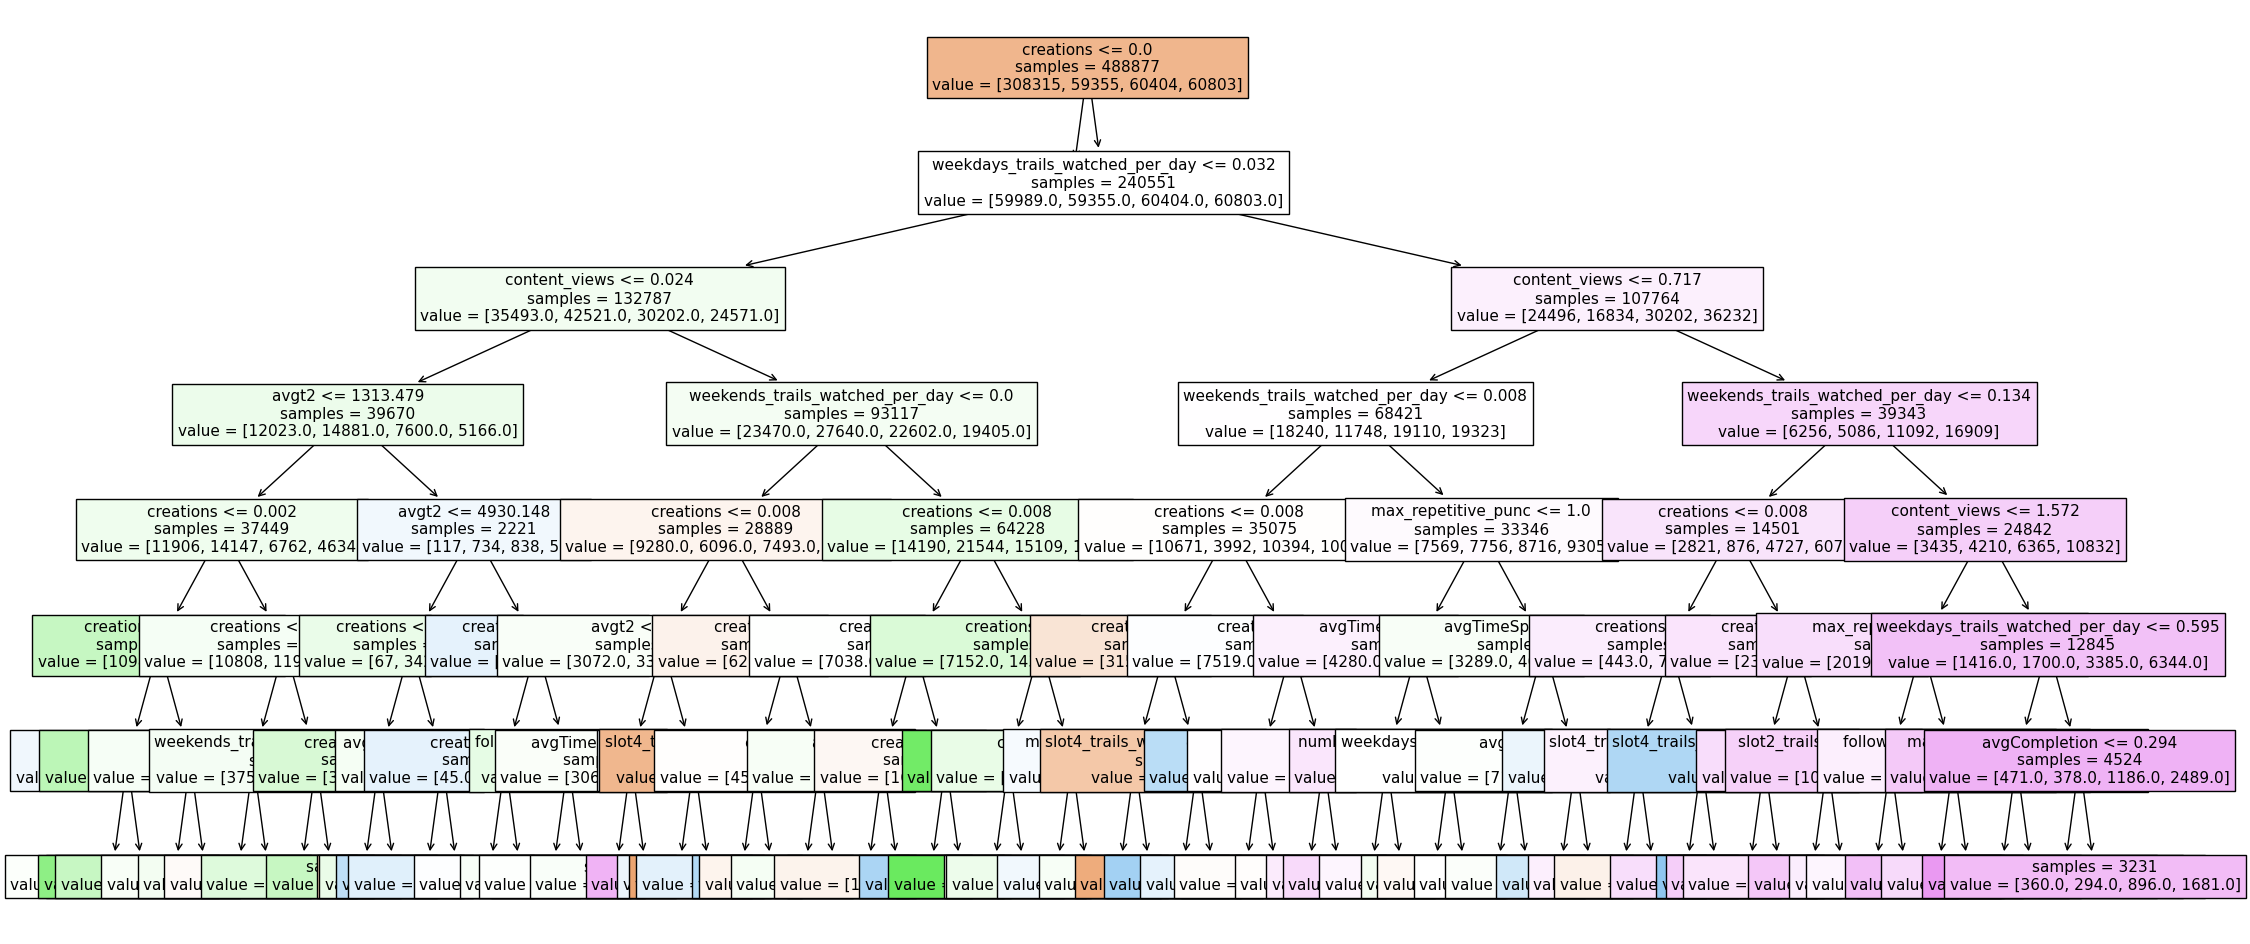

In [33]:
arbol(model, X_train)
#vemos que el atributo que discrimina entre los que se salvan y los que no es el sexo, lo que sigue son muestras 
#el valor es 549 para quienes no sobreviven y 342 oara quienes si 

## 7. Realizar predicciones

Tomamos los valores reales del dataset para compararlos con los valores de la predicción

In [36]:
def predicciones(tree, X, label):#aprendizaje supervissado, queremos las etiquetas para comprobar el porcentaje de acierto del modelo
    y_pred = tree.predict(X)#usamos la funcion predic con nuestro modelo, es decir las calsificacion con nuestro modelo
    y_true = label
    cm = confusion_matrix(y_true, y_pred, labels=tree.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree.classes_)#mostrar matriz de concfusion para ver aciertos y fallos
    disp.plot()
    plt.show()

    acc = accuracy_score(y_true, y_pred)#metrica de excatitud para calcular en cuantos casos acerto el modelo y en cuantos no
    f1 = f1_score(y_true, y_pred, average='weighted')# "weighted" se usa porque no esta balanceado el número de muestras
    #de casa clase. calcula el score f1 para cada clase y lo pondera 
    print(f'Accuracy = {acc * 100:.2f}%')
    print(f'F1 Score = = {f1 * 100:.2f}%')
    

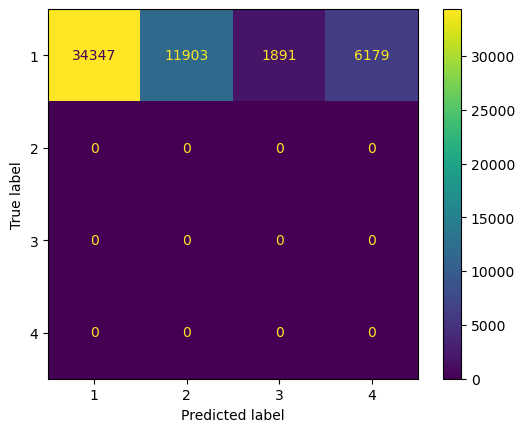

Accuracy = 63.23%
F1 Score = = 77.47%


In [35]:
predicciones(model, X_test, y_test)

### Se entrenó un árbol de decisión con diferentes métricas y parámetros:

- Con una profundidad de 5, el predictor gini arroja los siguientes resultados:
  
Accuracy = 56.29%  
F1 Score = 72.03%

- Con una profundidad de 6, el predictor gini arroja los siguientes resultados:
  
Accuracy = 58.10%  
F1 Score = = 73.50%

- Con una profundidad de 7, el predictor gini arroja los siguientes resultados:

Accuracy = 63.23%  
F1 Score = = 77.47%
- Con una profundidad de 8, el predictor gini arroja los siguientes resultados:

Accuracy = 60.56%  
F1 Score = = 75.44% 

#### vemos que con una profundidad de 8 el accuracy y el f1 ya no mejoraron, por lo que ahora se entrenará el modelo usando entropy

Con una profundidad de 5, el predictor entropy arroja los siguientes resultados:

Accuracy = 60.54%  
F1 Score = = 75.42%

Con una profundidad de 6, el predictor entropy arroja los siguientes resultados:

Accuracy = 61.86%  
F1 Score = = 76.44%

Con una profundidad de 7, el predictor entropy arroja los siguientes resultados:

Accuracy = 60.89%  
F1 Score = = 75.69%

#### vemos que con una profundidad de 7 el accuracy y el f1 ya no mejoraron.

#### Se dejarán definidas las métricas que dieron el mejor resultado que fue:

- profundidad de 7, predictor gini:

Accuracy = 63.23%  
F1 Score = = 77.47%



## <span style="color:DarkciónBlue"> 8. Conclusión </span>

#### En esta práctica se entrenó  un árbol de decisión que clasificara a personas por rango de edad, utilizando como métricas de (im)pureza de nodos tanto GINI como la entropía.

#### Se con concluye que:

- El atributo que mejor clasifica a las personas por rango de edad que usan la red social Trell es "creations" que es el número total de videos subidos por el usuario
- Las métricas que dieron mejor resultado fueron:

  - profundidad 7, predictor gini
  - Accuracy = 63.23%  
  - F1 Score = = 77.47%  
  - Número de nodos terminales:  65


    
- La metrica de exactitud hace referencia a en cuantos casos acertó el modelo, en este caso accuracy fue de 63.23%, quiere decir que el modelo acierta en 63 casos de 100 
- score F1 es del 77% y tomando en cuenta que esta métrica es una medida (media armónica) de la precisión ( que considera falsos positivos) y del  recall (que considera falsos negativos) nos habla de confiabilidad del modelo
